In [31]:
import sys
sys.path.append('../')

import math

import numpy as np

from matplotlib import pyplot as plt
from IPython.display import HTML

from matk.utils.animation import animate_frames
from matk.models.determenistic_chaos import DetermenisticChaosModel
from matk.models.base_model import _BaseModel

%matplotlib inline

In [61]:
def angle_to(p1, p2, rotation=0, clockwise=True):
    if abs(rotation) > 360:
        rotation %= 360
    p2 = list(p2)
    p2[0] = p2[0] - p1[0]
    p2[1] = p2[1] - p1[1]

    angle = math.degrees(math.atan2(p2[1], p2[0]))
    if clockwise:
        angle -= rotation
        return angle if angle > 0 else angle + 360
    else:
        angle = (360 - angle if angle > 0 else -1 * angle) - rotation
        return angle if angle > 0 else angle + 360

from typing import Tuple

class CenterModel(_BaseModel):
    
    def __init__(
        self,
        n_points: int,
        field_size: Tuple[int, int],
        step_size: int,
        keep_trajoctories: bool = False
    ):
        super().__init__(
            n_points=n_points,
            field_size=field_size,
            step_size=step_size,
            keep_trajoctories=keep_trajoctories
        )
                
        self.points = []
        
    def create_field(self):
        point_coords = [np.random.randint(0, f_size, self.n_points) for f_size in self.field_size]
        point_coords = np.stack(point_coords, axis=-1).astype(float) 
        
        self.points.append(point_coords)
        self.markup_field(point_coords)
        
    def step(self):        
        current_coord = self.points[-1].copy()
        for i in range(current_coord.shape[0]):
            new_coord = self.step_function(current_coord[i])
            new_coord = self.continious_boarder_mode(new_coord)
            current_coord[i] = new_coord
            
        self.points.append(current_coord)
        self.markup_field(current_coord)
        
    def step_function(self, previous_coord: np.ndarray):
        
        angle_init_1 = angle_to(previous_coord, [self.field_size[0] / 2, self.field_size[1] / 2], 85)
        angle_init_2 = angle_to(previous_coord, [self.field_size[0] / 2, self.field_size[1] / 2], 360 - 85)
                
        angle = np.random.choice([
            angle_init_1, 
            angle_init_2
        ])
        
        rad = math.radians(angle)
                
        previous_coord[0] += (math.cos(rad) * self.step_size)
        previous_coord[1] += (math.sin(rad) * self.step_size)
        
        previous_coord = self.continious_boarder_mode(previous_coord)
        
        return previous_coord
    
    def reset_partial(self):
        self.angles = []
        self.real_angles = []
        self.points = []

In [62]:
chaos_model = CenterModel(10, (128,128), 1, keep_trajoctories=False)

In [63]:
chaos_model.run_n_steps(500)

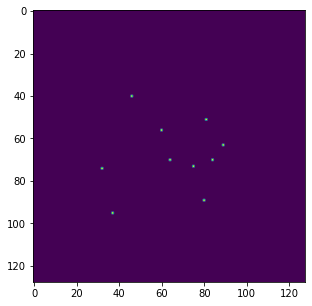

In [64]:
ani = animate_frames(chaos_model)
HTML(ani.to_jshtml())